In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [32]:
df = pd.read_csv("./data/penguins_size.csv");
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [33]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [34]:
row_to_delete =  df[df["sex"] == "."].index
df.drop(row_to_delete, inplace=True)
df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [36]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [37]:
imputer = SimpleImputer(strategy="most_frequent")
df.iloc[:,:] = imputer.fit_transform(df)

In [38]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [39]:
le= LabelEncoder()
df["gender"] = le.fit_transform(df["sex"])
df = df.drop(["sex"], axis = 1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0


In [40]:
# machine learning

In [41]:
pd.get_dummies(df["island"])

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
339,1,0,0
340,1,0,0
341,1,0,0
342,1,0,0


In [42]:
pd.get_dummies(df[["island"]])

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
339,1,0,0
340,1,0,0
341,1,0,0
342,1,0,0


In [43]:
island = pd.get_dummies(df[["island"]], drop_first=True)
island
# If we know 2 columns, we can find the 3rd one, so we subtract one column.
# allows us to reduce dimensionality(boyutsallığı düşürüyoruz)

,island_Dream,island_Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
339,0,0
340,0,0
341,0,0
342,0,0


In [47]:
df_2 = pd.concat([df,island], axis = 1)
df_2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,1,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0,1
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,1,0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0,0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1,0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0,0,0


In [52]:
# now i dont need island column
df_2 = df_2.drop(["island"], axis = 1)

In [53]:
df_2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
3,Adelie,41.1,17.0,190.0,3800.0,1,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1


In [54]:
target, features = df_2.species, df_2.drop(["species"], axis = 1)

In [56]:
target

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 343, dtype: object

In [57]:
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,1
3,41.1,17.0,190.0,3800.0,1,0,1
4,36.7,19.3,193.0,3450.0,0,0,1
...,...,...,...,...,...,...,...
339,41.1,17.0,190.0,3800.0,1,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,1,0,0
342,45.2,14.8,212.0,5200.0,0,0,0


## convert it to the normal distribution
- standard mean μ
- standard deviation σ

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [62]:
features.iloc[:, :4]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,41.1,17.0,190.0,3800.0
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,41.1,17.0,190.0,3800.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [63]:
scaler.fit(features.iloc[:, :4])

StandardScaler()

In [65]:
features.iloc[:, :4] = scaler.transform(features.iloc[:, :4])

In [66]:
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,-0.881787,0.785506,-1.412793,-0.559756,1,0,1
1,-0.808363,0.124768,-1.056111,-0.497207,0,0,1
2,-0.661515,0.429724,-0.414084,-1.185254,0,0,1
3,-0.514666,-0.078536,-0.770765,-0.497207,1,0,1
4,-1.322333,1.090461,-0.556756,-0.935055,0,0,1
...,...,...,...,...,...,...,...
339,-0.514666,-0.078536,-0.770765,-0.497207,1,0,0
340,0.531631,-1.450837,1.012644,0.816338,0,0,0
341,1.192449,-0.739273,1.511998,1.942234,1,0,0
342,0.237933,-1.196707,0.798634,1.254186,0,0,0


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()

In [69]:
target

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 343, dtype: object

In [71]:
target_encoded = le.fit_transform(target)
target_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(features,target_encoded, test_size=0.2, random_state=42)

In [75]:
x_train.shape

(274, 7)

In [76]:
x_test.shape

(69, 7)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [80]:
tree = DecisionTreeClassifier()

In [81]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
predict = tree.predict(x_test)
predict

array([2, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 0])

In [83]:
confusion_matrix(y_test,predict)

array([[33,  0,  2],
       [ 2, 10,  0],
       [ 0,  0, 22]])

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

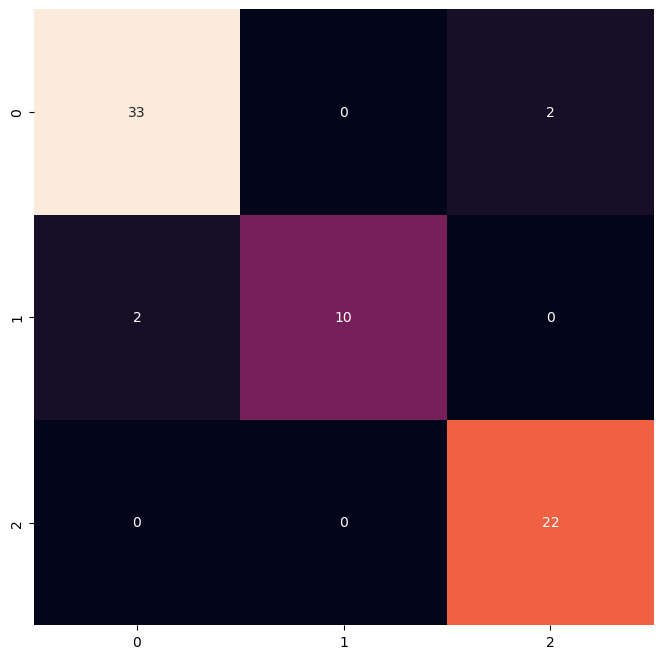

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,predict), annot=True, cbar=False);

In [94]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       1.00      0.83      0.91        12
           2       0.92      1.00      0.96        22

    accuracy                           0.94        69
   macro avg       0.95      0.93      0.94        69
weighted avg       0.94      0.94      0.94        69



In [97]:
print(f"Accuracy Score = %{accuracy_score(y_test,predict) * 100}")

Accuracy Score = %94.20289855072464


In [98]:
features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen
0,-0.881787,0.785506,-1.412793,-0.559756,1,0,1
1,-0.808363,0.124768,-1.056111,-0.497207,0,0,1
2,-0.661515,0.429724,-0.414084,-1.185254,0,0,1
3,-0.514666,-0.078536,-0.770765,-0.497207,1,0,1
4,-1.322333,1.090461,-0.556756,-0.935055,0,0,1
...,...,...,...,...,...,...,...
339,-0.514666,-0.078536,-0.770765,-0.497207,1,0,0
340,0.531631,-1.450837,1.012644,0.816338,0,0,0
341,1.192449,-0.739273,1.511998,1.942234,1,0,0
342,0.237933,-1.196707,0.798634,1.254186,0,0,0


In [99]:
target_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [100]:
pd.Series(target_encoded)

0      0
1      0
2      0
3      0
4      0
      ..
338    2
339    2
340    2
341    2
342    2
Length: 343, dtype: int64

In [107]:
final_df = pd.concat([features,pd.Series(target_encoded, name="Target")], axis = 1)
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender,island_Dream,island_Torgersen,Target
0,-0.881787,0.785506,-1.412793,-0.559756,1.0,0.0,1.0,0.0
1,-0.808363,0.124768,-1.056111,-0.497207,0.0,0.0,1.0,0.0
2,-0.661515,0.429724,-0.414084,-1.185254,0.0,0.0,1.0,0.0
3,-0.514666,-0.078536,-0.770765,-0.497207,1.0,0.0,1.0,0.0
4,-1.322333,1.090461,-0.556756,-0.935055,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
340,0.531631,-1.450837,1.012644,0.816338,0.0,0.0,0.0,2.0
341,1.192449,-0.739273,1.511998,1.942234,1.0,0.0,0.0,2.0
342,0.237933,-1.196707,0.798634,1.254186,0.0,0.0,0.0,2.0
343,1.100669,-0.535969,0.869971,1.504385,1.0,0.0,0.0,NaN


In [108]:
final_df.to_csv("./data/penguins_scaled.csv", index=False)
# final_df.to_csv("./data/penguins_scaled.csv", index=False, header=False, encoding="utf-8", sep=";")